In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
import sys

sns.set_style('whitegrid')

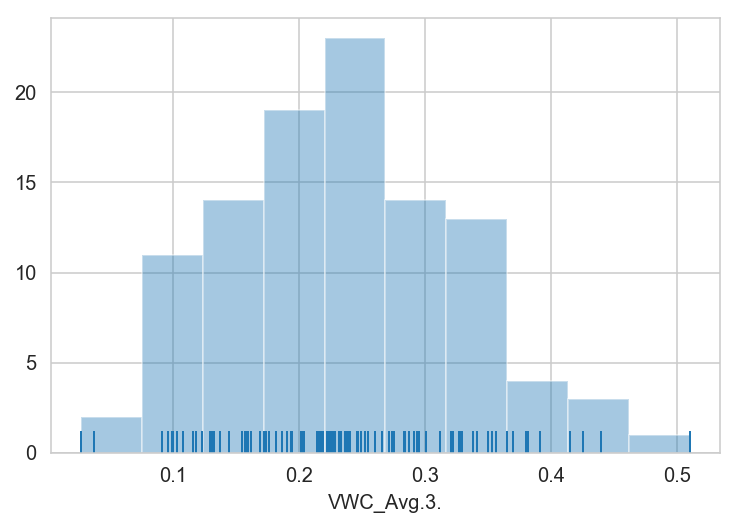

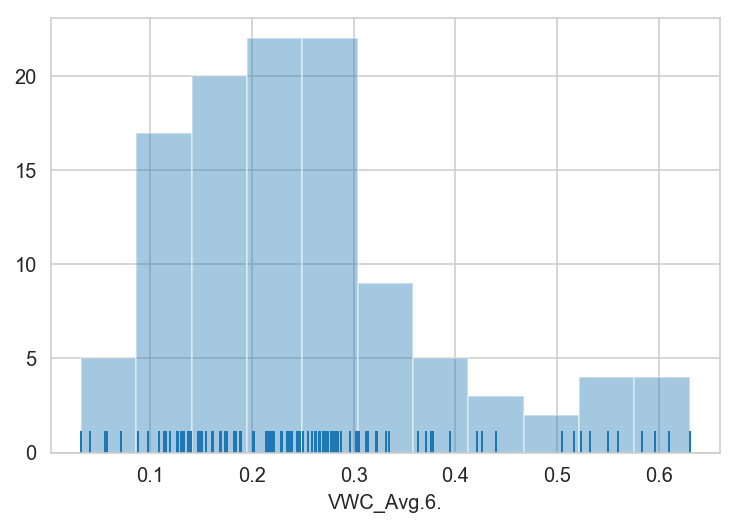

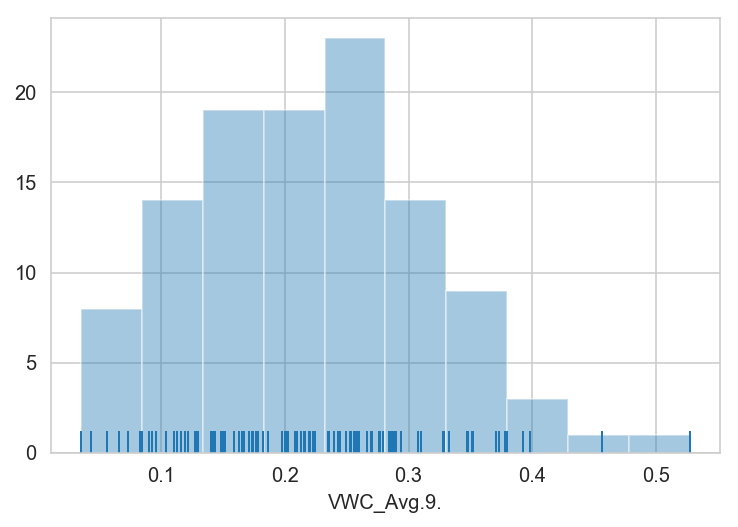

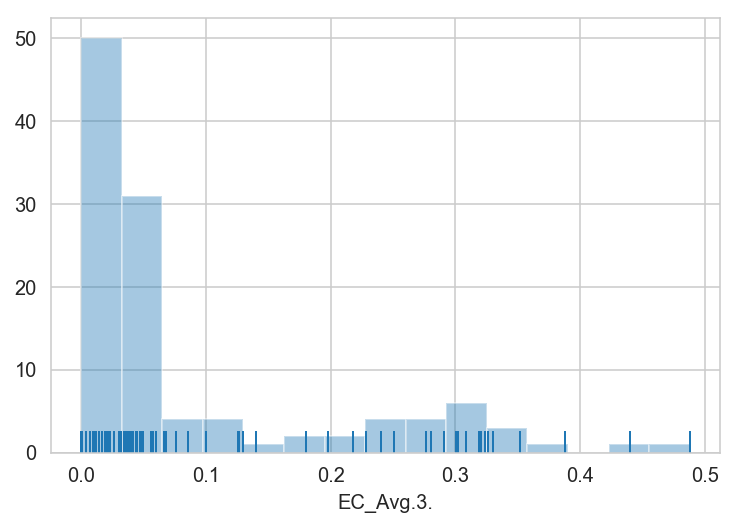

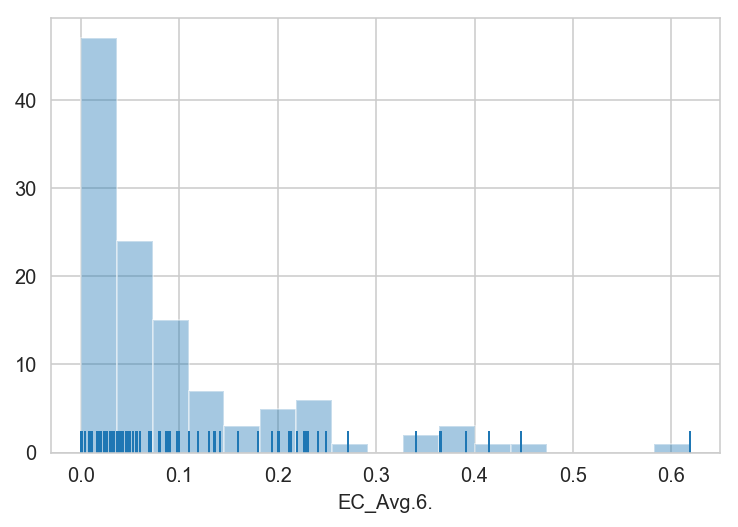

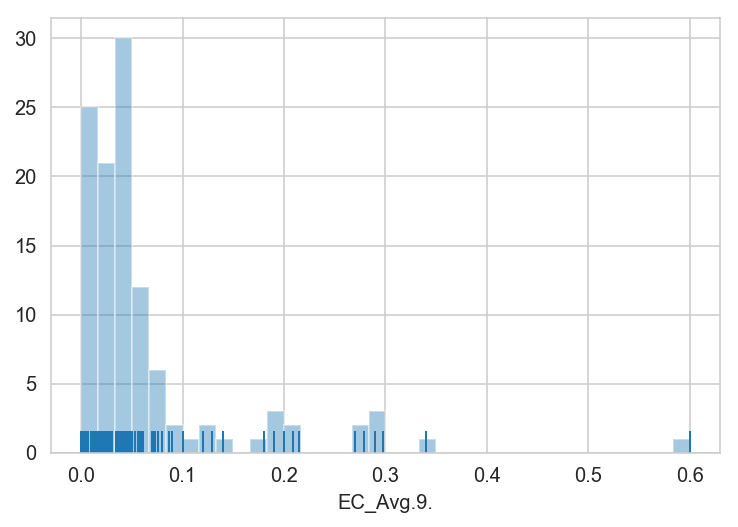

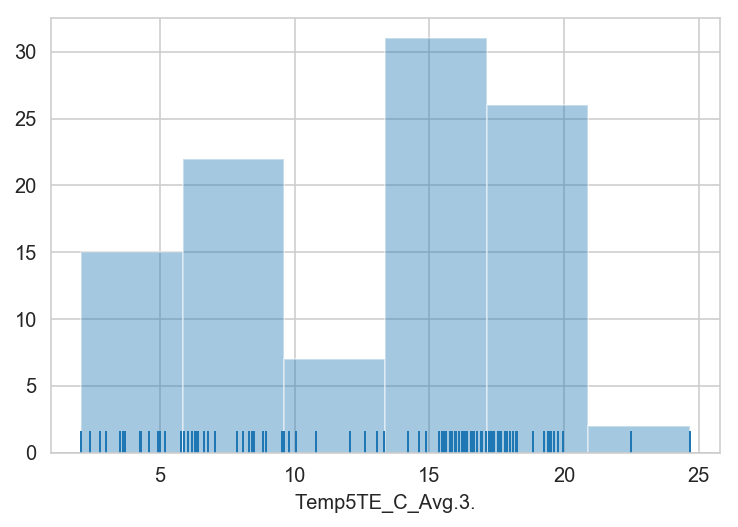

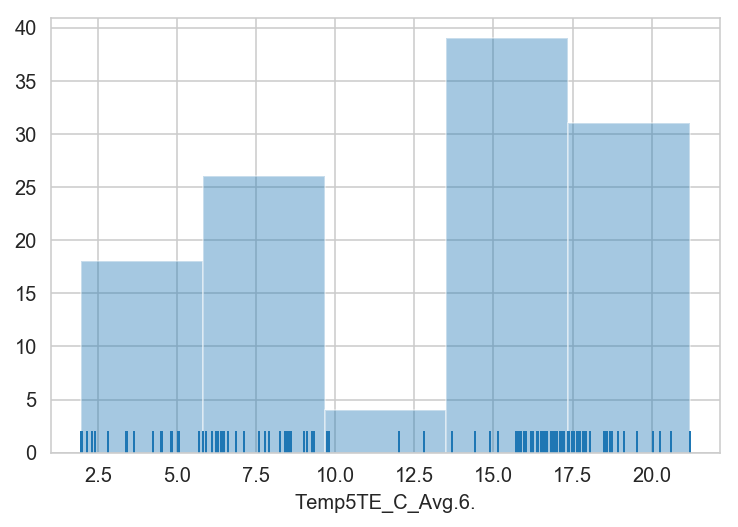

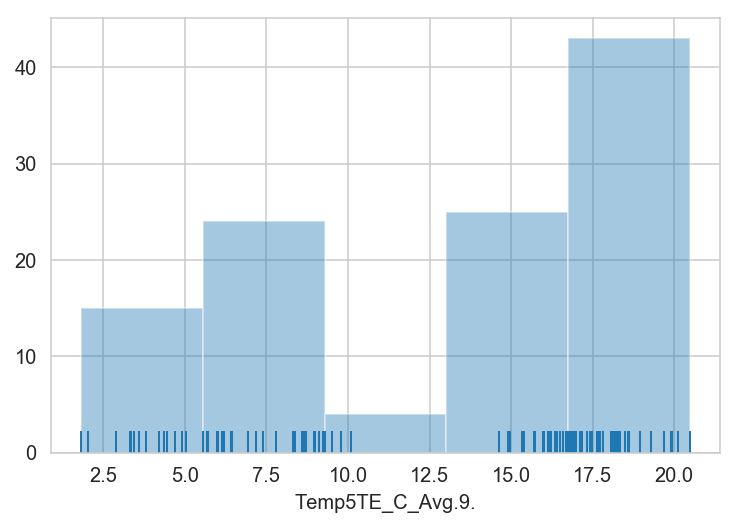

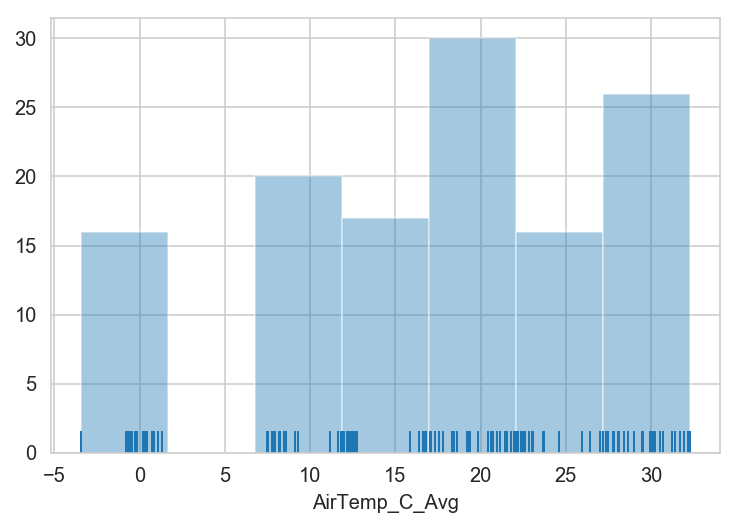

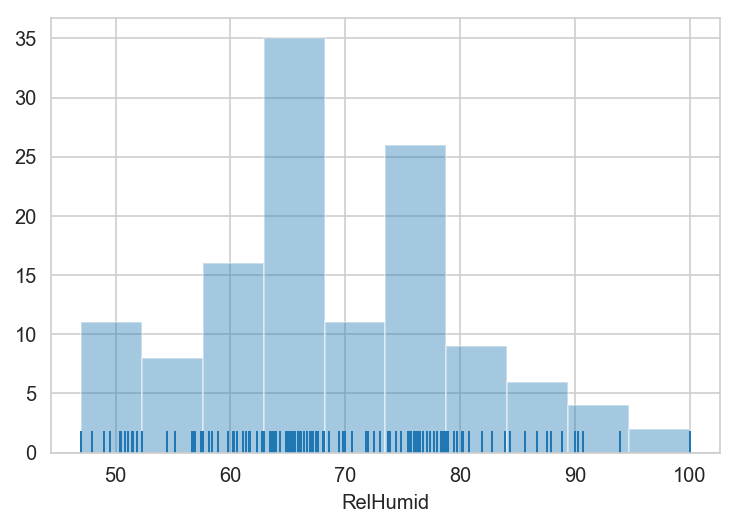

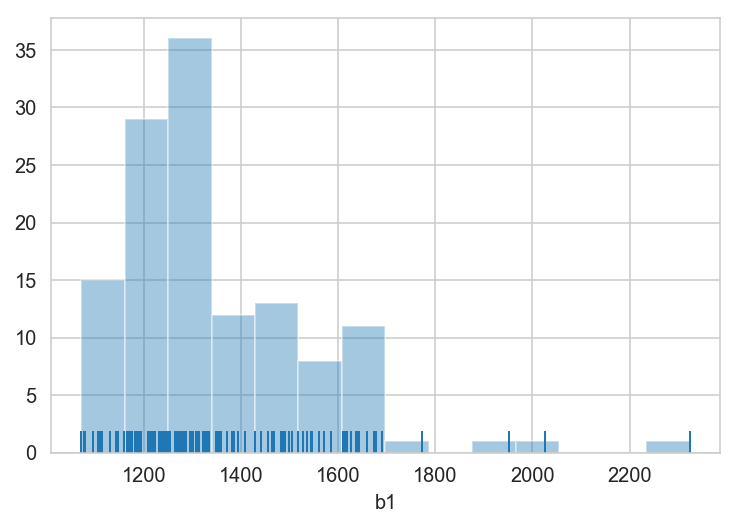

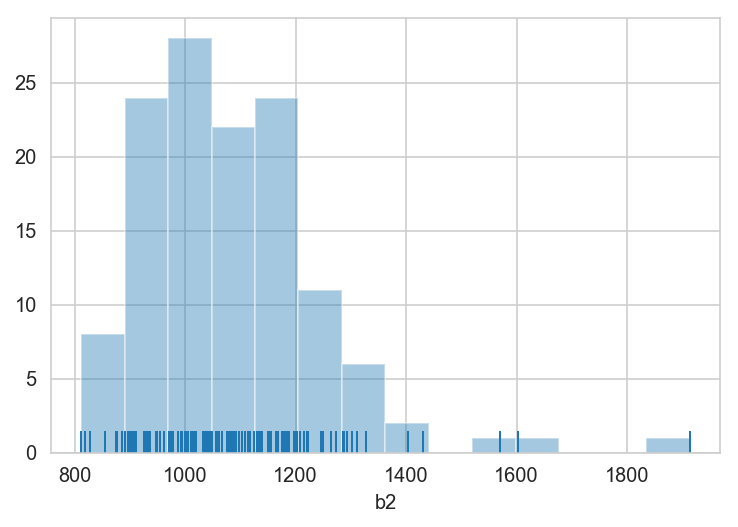

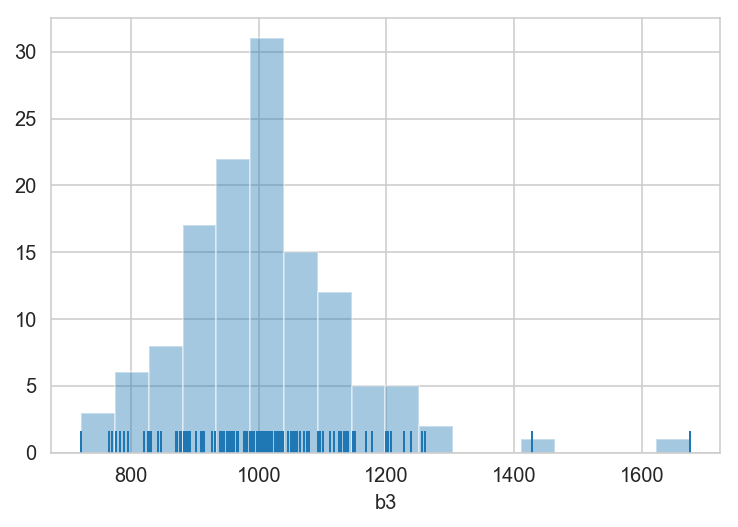

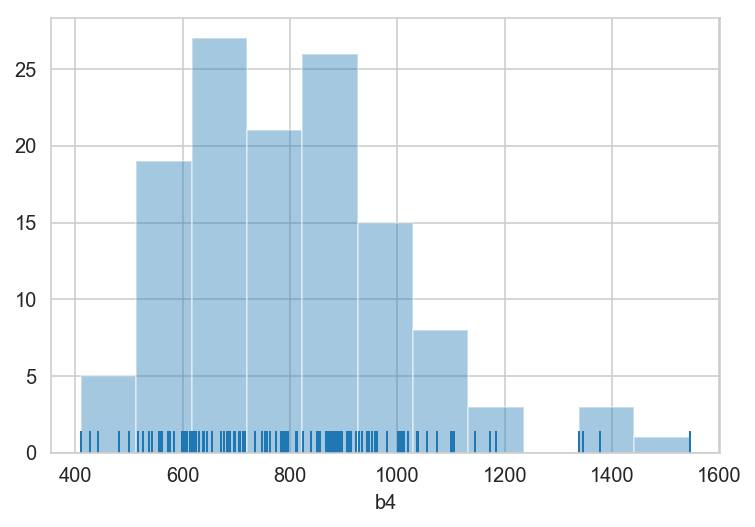

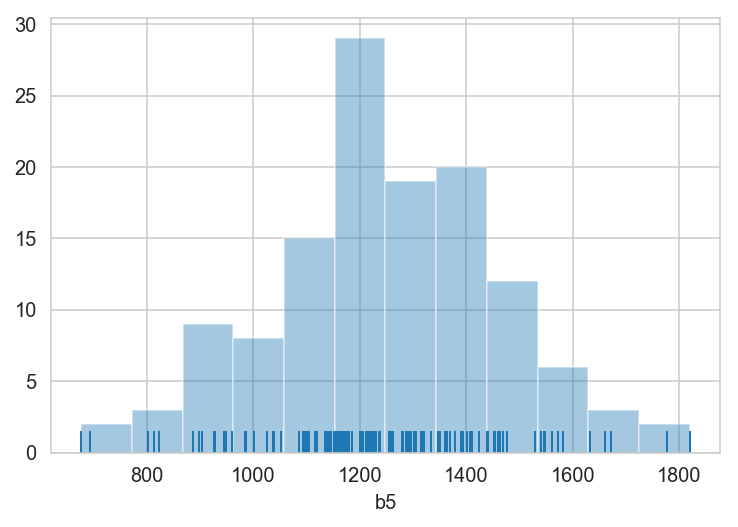

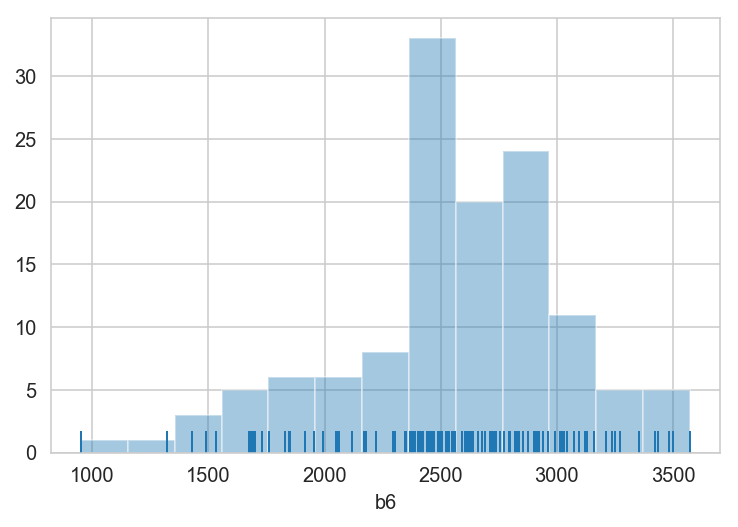

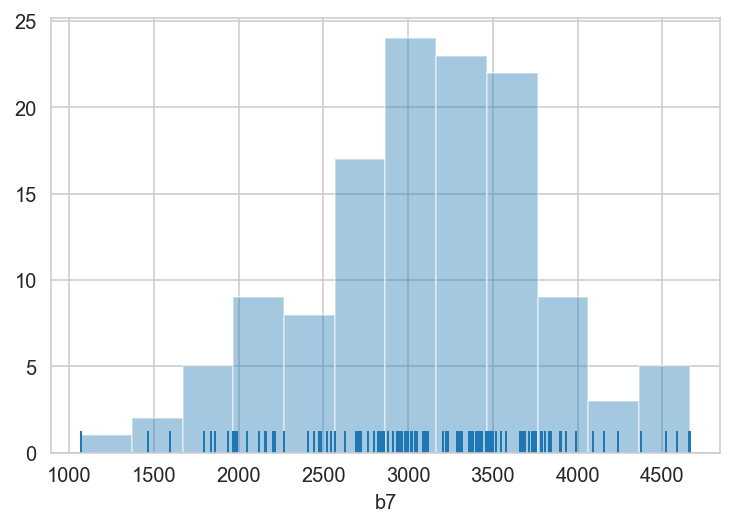

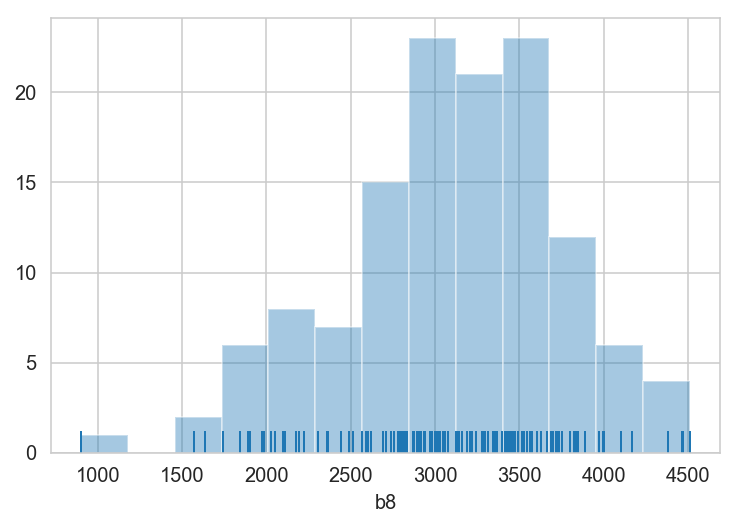

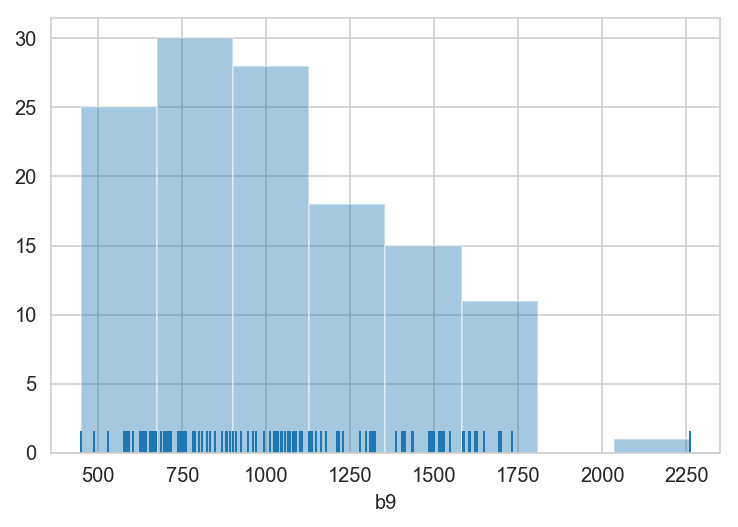

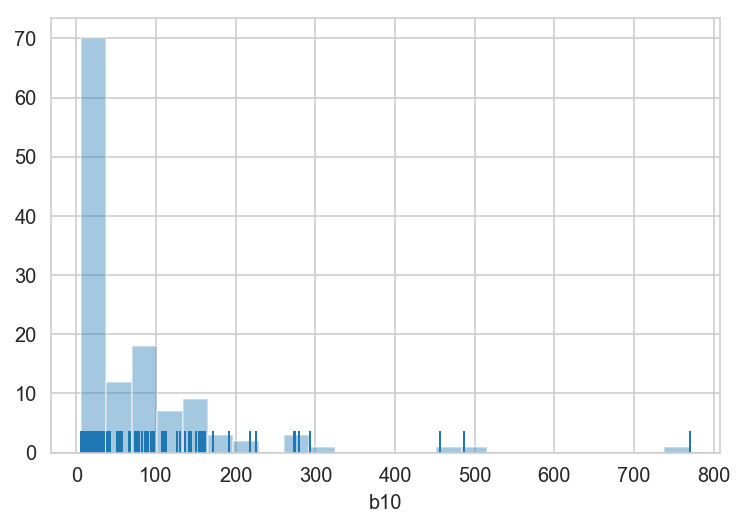

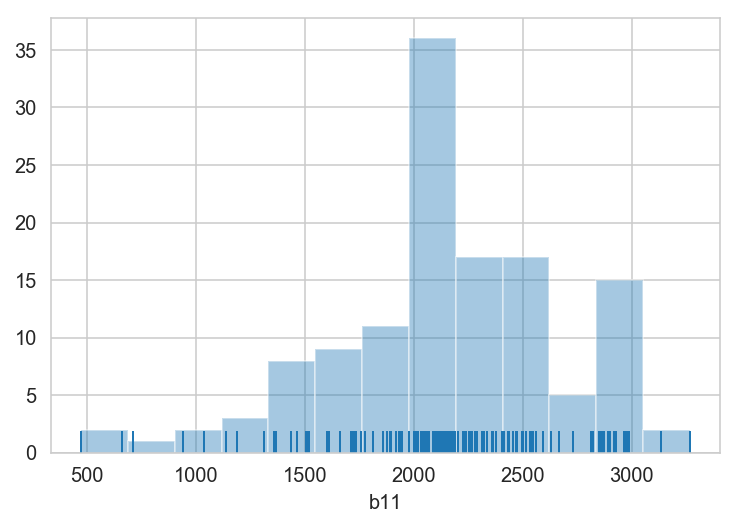

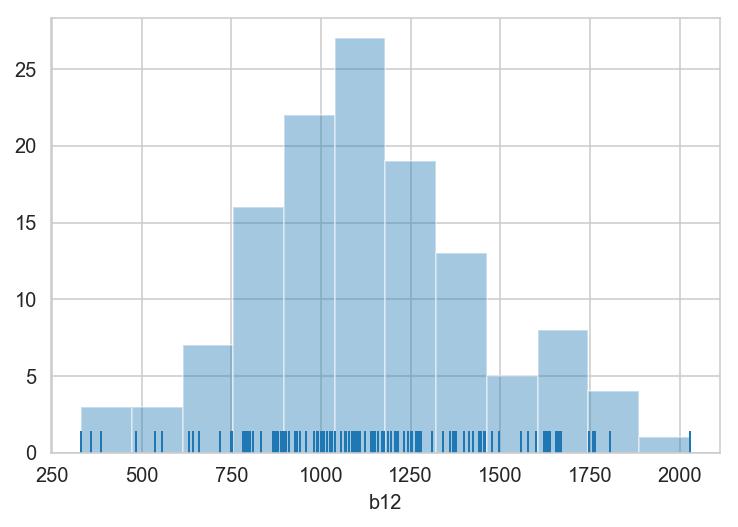

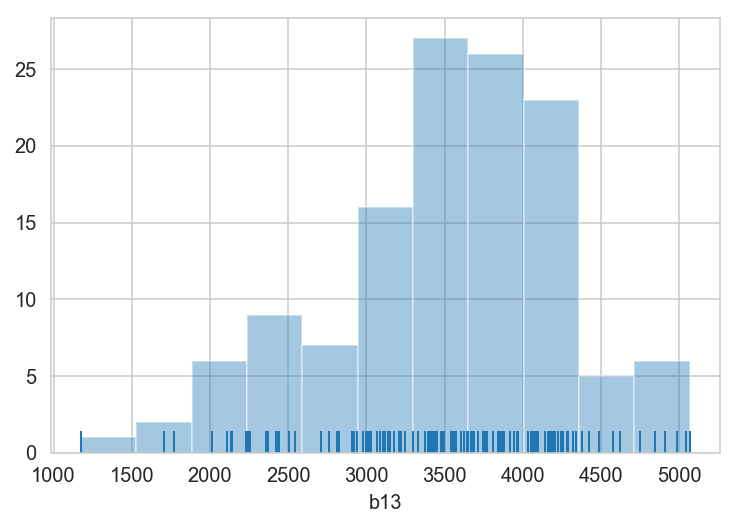

In [2]:
df = pd.read_csv('./processed_data/merged_dataset_all_vwc_sensors.csv', sep=';', index_col=0, na_values='NA')

for col in df.columns.values.tolist()[2:]:
    sns.distplot(df[col].dropna(), kde=False, rug=True)
    plt.savefig('./plots/'+col+'_hist.pdf')
    plt.show()    

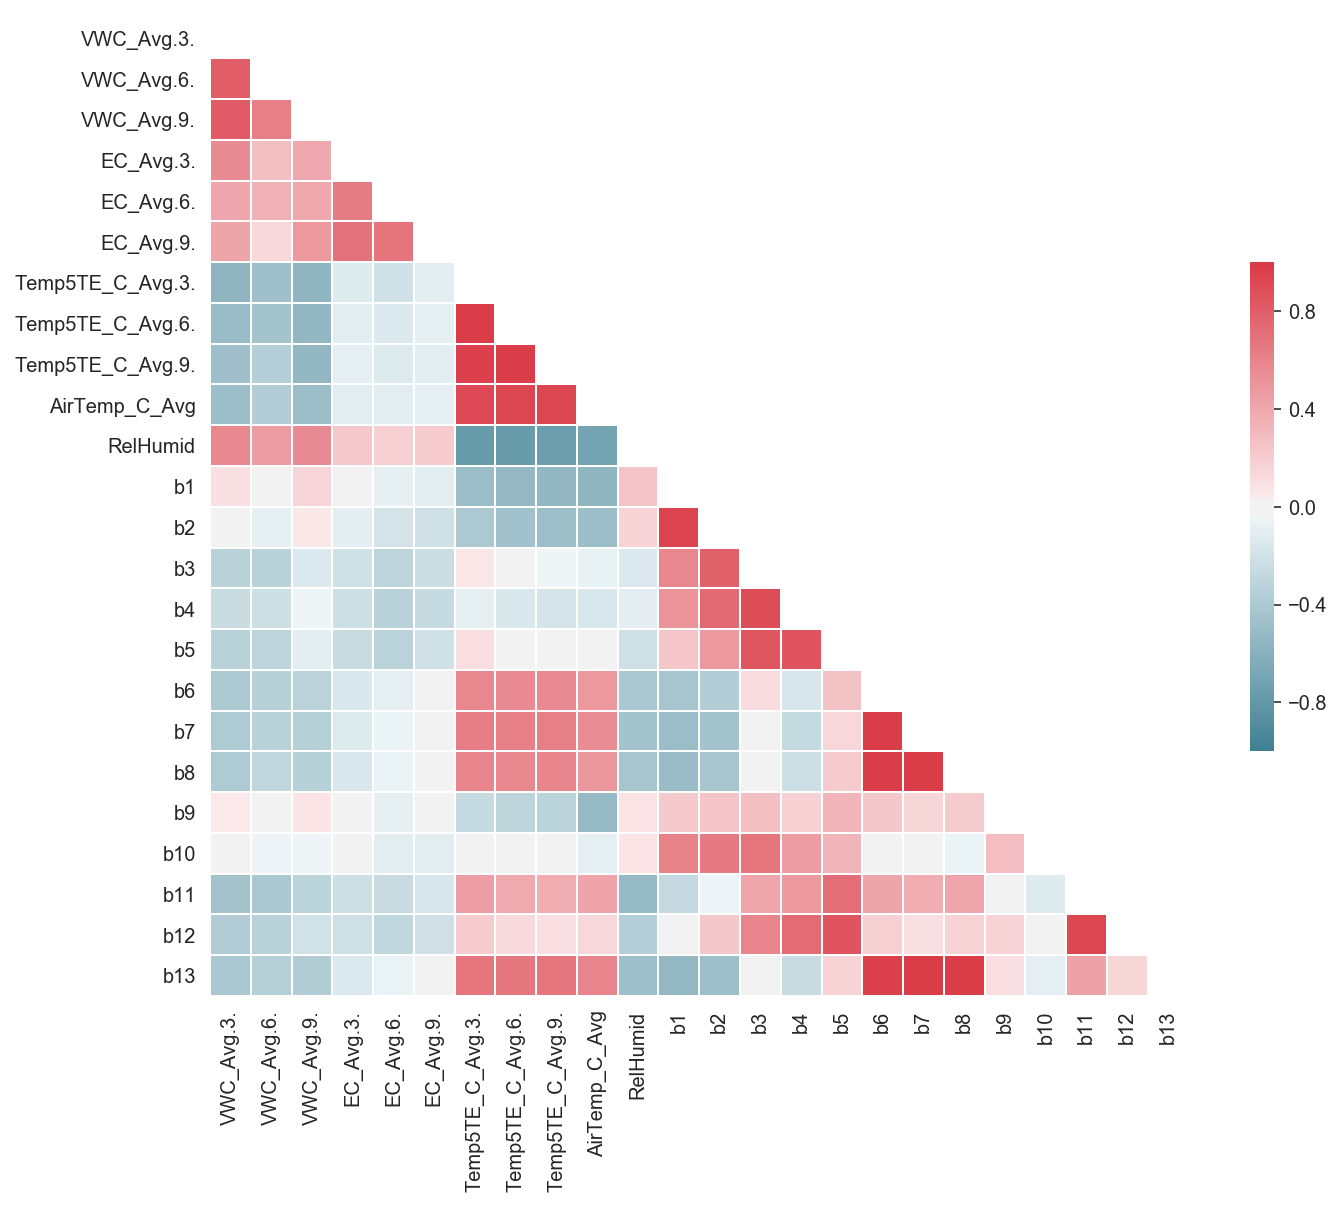

In [3]:
corr = df.iloc[:,2:].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('./plots/correlation.pdf')
plt.show()

### Are all Sensors equally good?
##### VWC


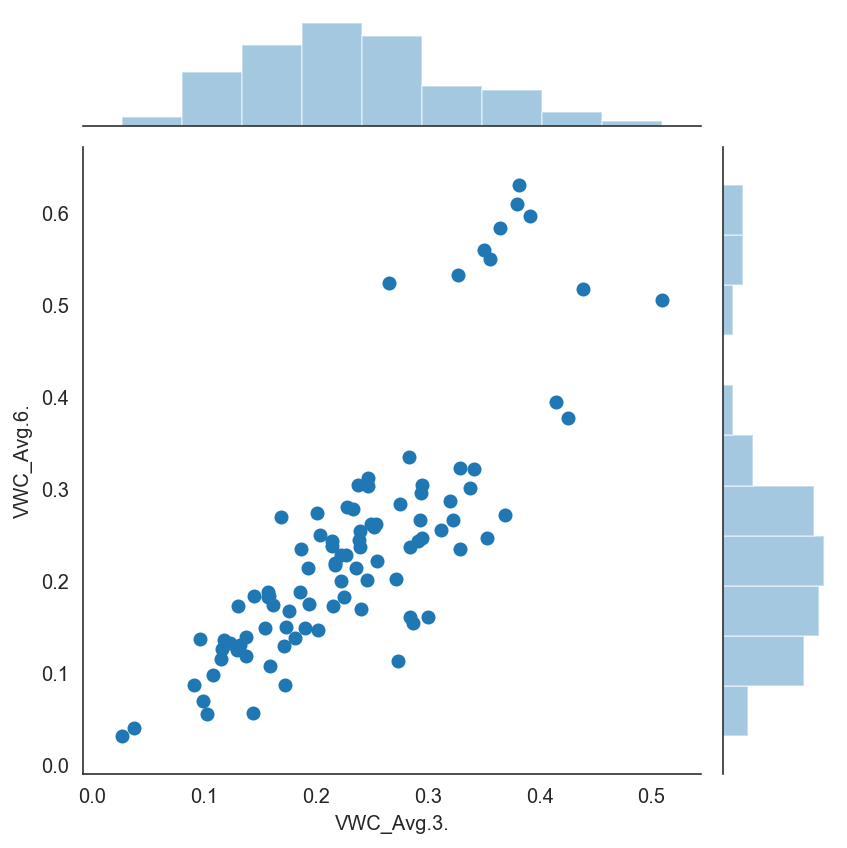

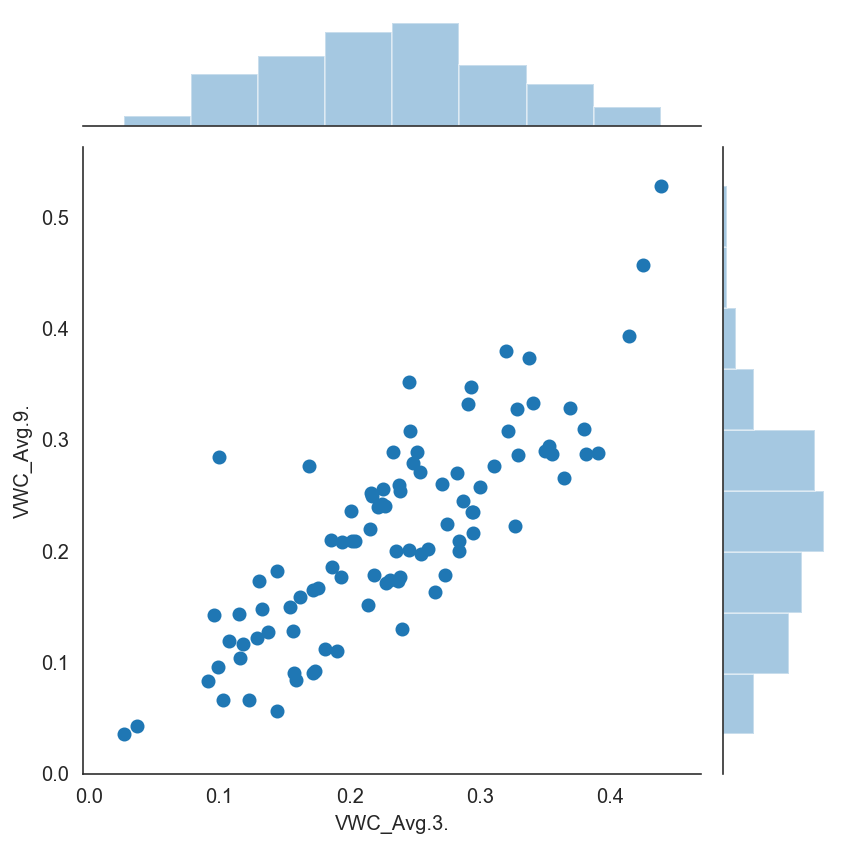

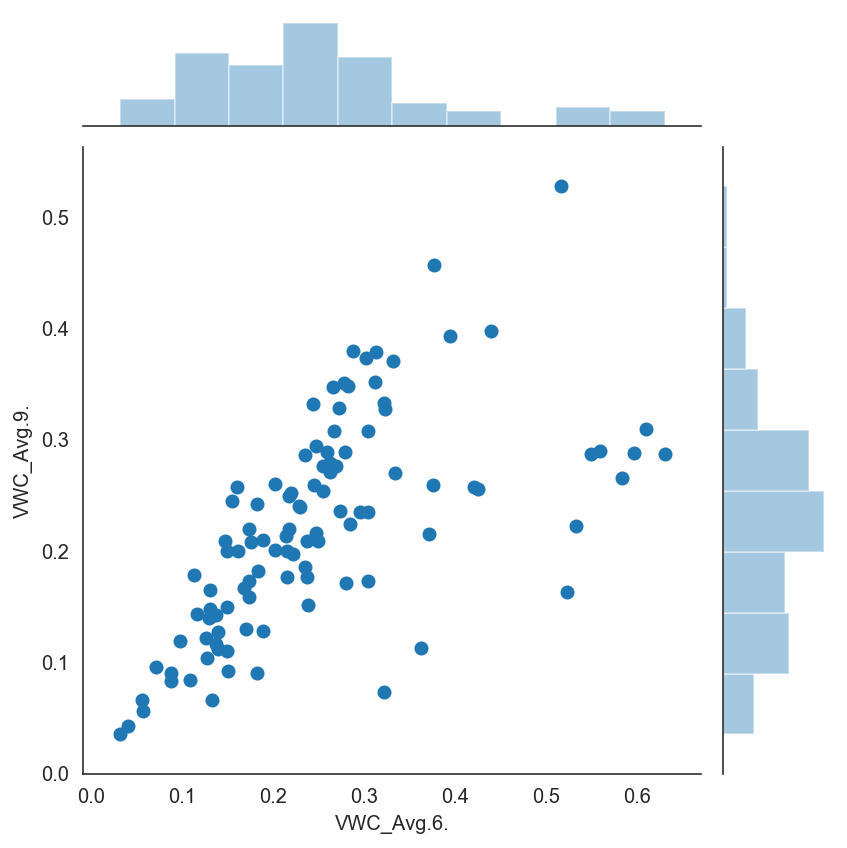

In [4]:
sns.set_style('white')

sns.jointplot(df.iloc[:,2], df.iloc[:,3])
plt.savefig('./plots/3_vs_6_VWC.pdf')

plt.show()

sns.jointplot(df.iloc[:,2], df.iloc[:,4])
plt.savefig('./plots/3_vs_9_VWC.pdf')

plt.show()

sns.jointplot(df.iloc[:,3], df.iloc[:,4])
plt.savefig('./plots/6_vs_9_VWC.pdf')
plt.show()


Sensor 6 seems to be inaccurate. Therefore we proceed only with Sensors 3 and 9. The same analysis is made for the other variables.

##### EC



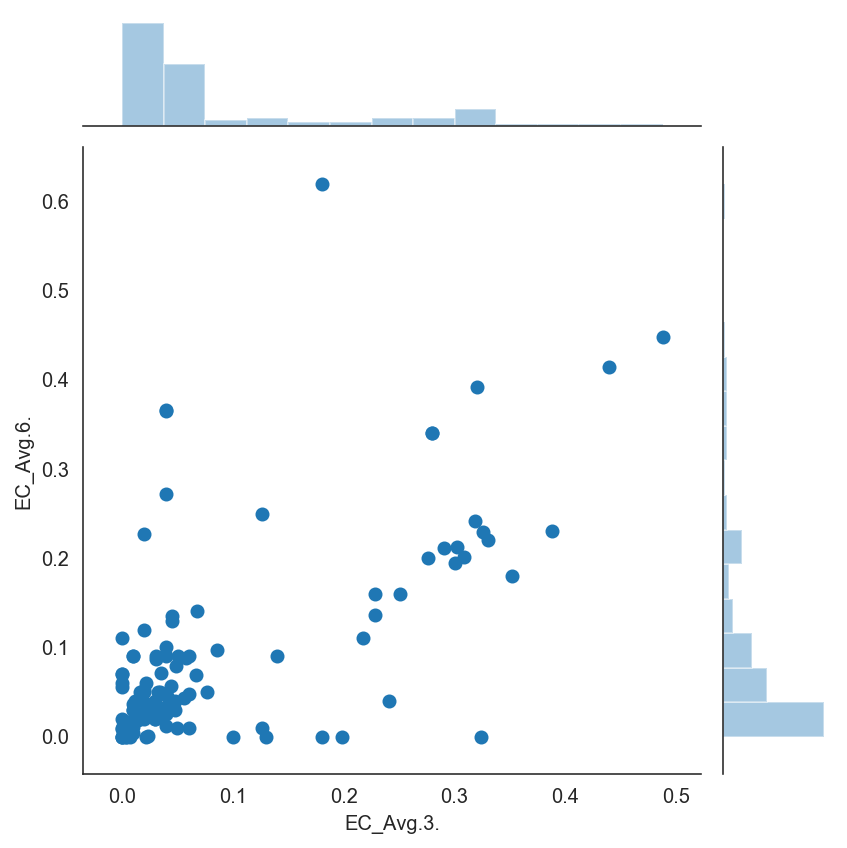

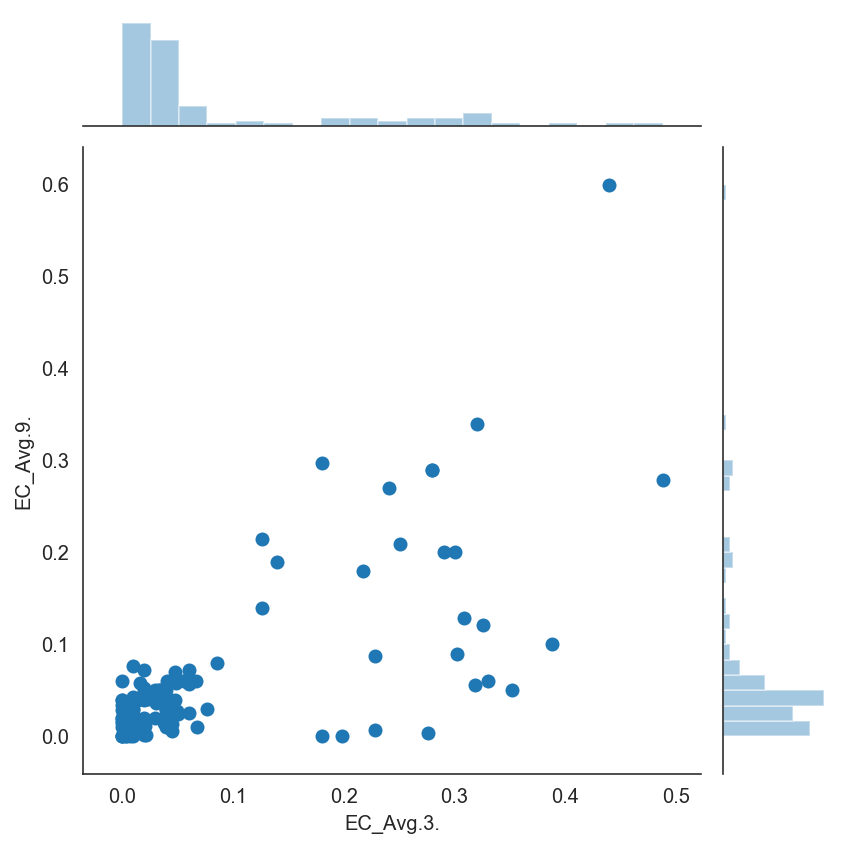

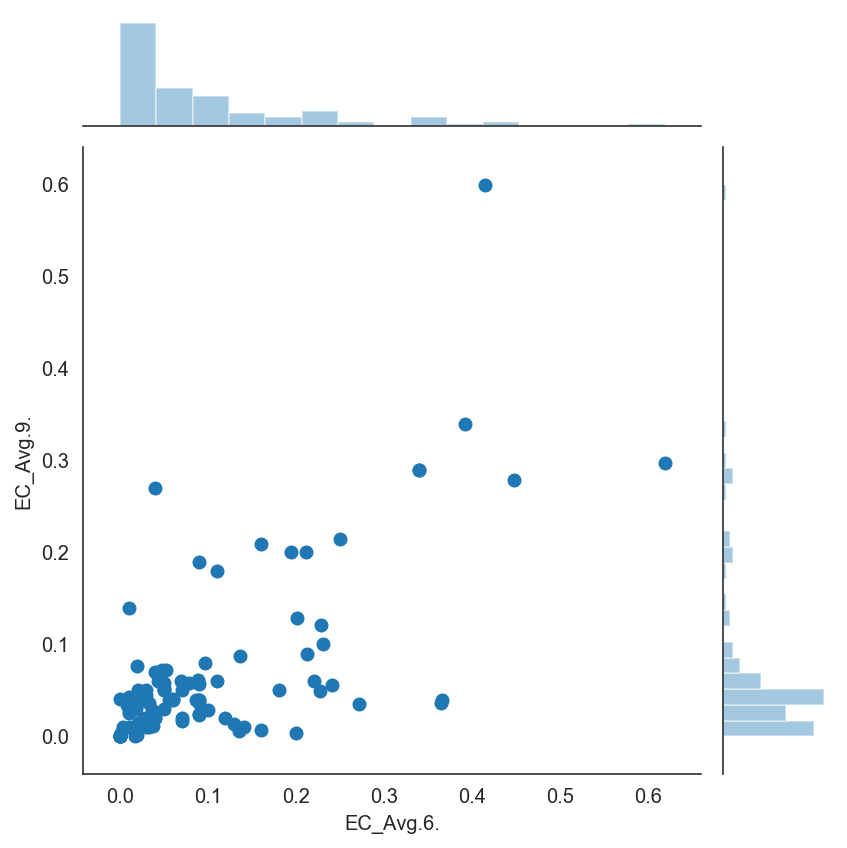

In [5]:
sns.jointplot(df.iloc[:,5], df.iloc[:,6])
plt.savefig('./plots/3_vs_6_EC.pdf')

plt.show()

sns.jointplot(df.iloc[:,5], df.iloc[:,7])
plt.savefig('./plots/3_vs_9_EC.pdf')

plt.show()

sns.jointplot(df.iloc[:,6], df.iloc[:,7])
plt.savefig('./plots/6_vs_9_EC.pdf')
plt.show()

#### Temp

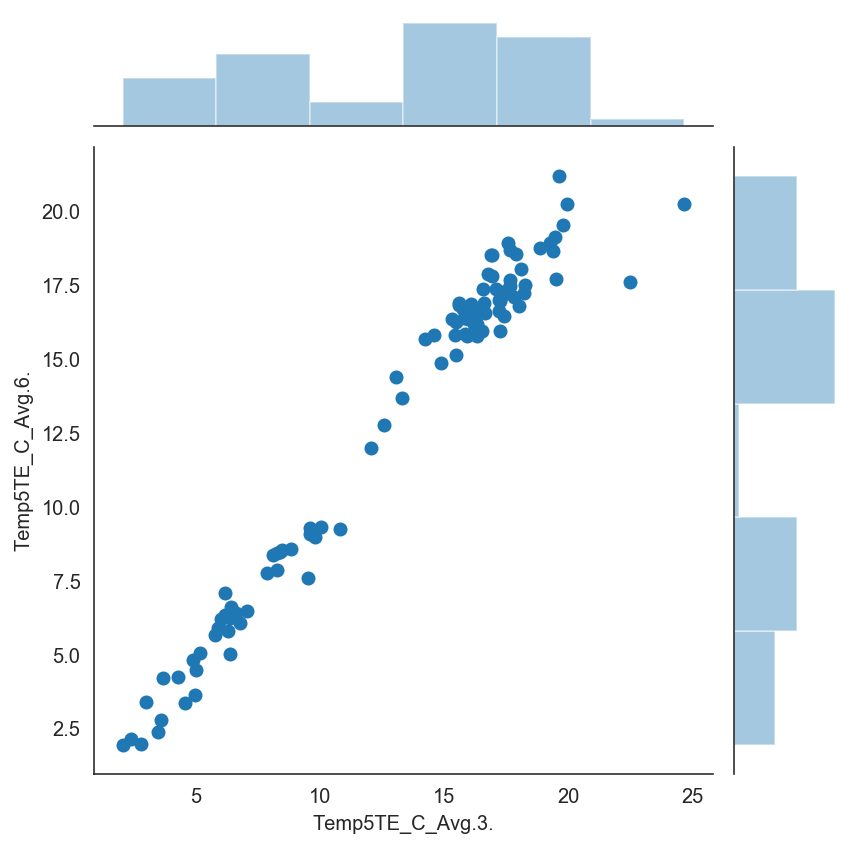

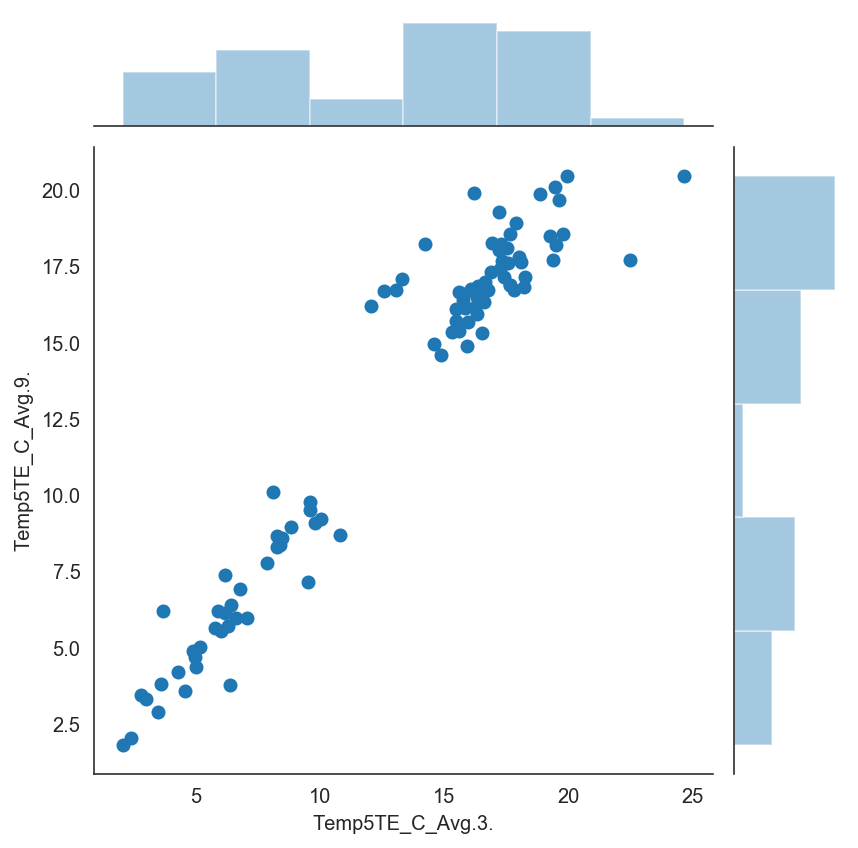

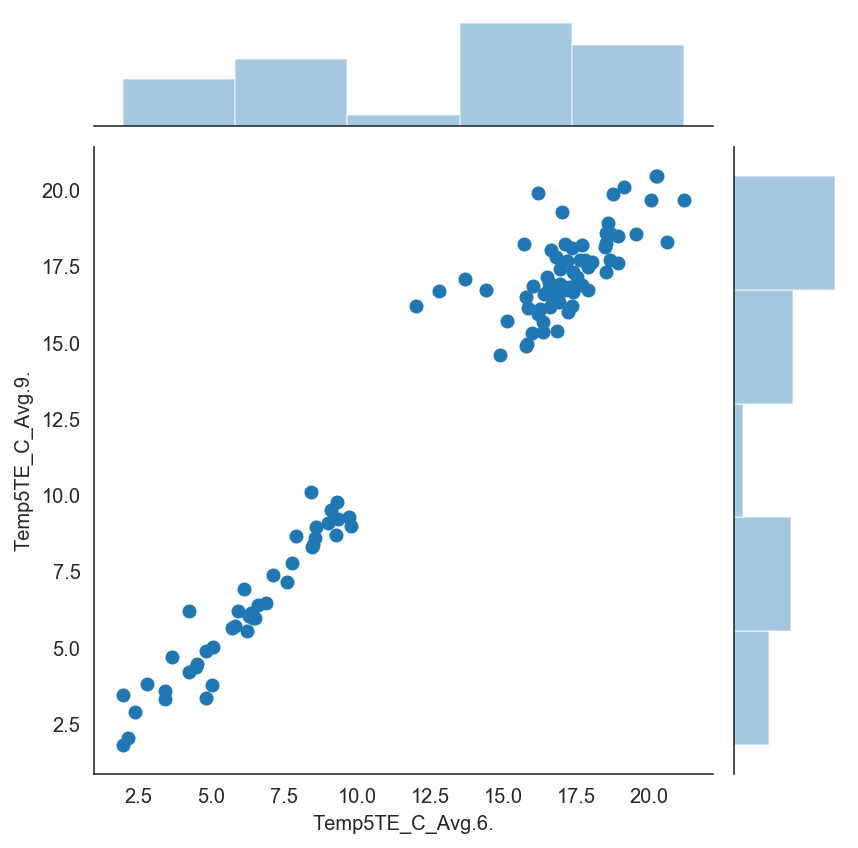

In [6]:
sns.jointplot(df.iloc[:,8], df.iloc[:,9])
plt.savefig('./plots/3_vs_6_Temp.pdf')

plt.show()

sns.jointplot(df.iloc[:,8], df.iloc[:,10])
plt.savefig('./plots/3_vs_9_Temp.pdf')

plt.show()

sns.jointplot(df.iloc[:,9], df.iloc[:,10])
plt.savefig('./plots/6_vs_9_Temp.pdf')
plt.show()

### Now we try to find the best station candidates for splitting into test- and training-dataset

In [7]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('./processed_data/merged_dataset.csv', sep=';', index_col=0, na_values='NA')

df = df[(df['VWC_Avg.']>0.1) & (df['VWC_Avg.']<0.39)]

train, test = train_test_split(df, test_size=0.25)

test.to_csv('./processed_data/merged_dataset_test_random.csv', sep=';', na_rep='NA')
train.to_csv('./processed_data/merged_dataset_train_random.csv', sep=';', na_rep='NA')



In [8]:
df = pd.read_csv('./processed_data/merged_dataset.csv', sep=';', index_col=0, na_values='NA')

m_names = ['M_C','M_D','M_E','M_F','M_G','M_H']
s_names = ['S_L','S_K','S_I','S_P','S_Q','S_R','S_J']
sa_names = ['Sa_L','Sa_K','Sa_J']
names = ['M_C','M_D','M_E','M_F','M_G','M_H','S_L','S_K','S_I','S_P','S_Q','S_R','S_J','Sa_L','Sa_K','Sa_J']

def is_comb_valid(stations, comps):
    
    for liste in combs:
        if sorted(stations) == liste:
            return False
    
    for name in names:
        # two equal stations?
        counter1=0
        for station in stations:
            if name == station:
                counter1 += 1
        if counter1 >1:
            return False
        
        # two times Sa?
        counter2=0
        for station in stations:
            if station.startswith('Sa'):
                counter2 += 1
        if counter2 >1:
            return False
    
    return True
                
        
    
combs = []

for m_name in m_names:
    for s_name in s_names:
        for sa_name in sa_names:
            for name in names:
                stations = [m_name, s_name, sa_name, name]

                if is_comb_valid(stations, combs):
                    combs.append(sorted(stations))
                    print(stations)



['M_C', 'S_L', 'Sa_L', 'M_D']
['M_C', 'S_L', 'Sa_L', 'M_E']
['M_C', 'S_L', 'Sa_L', 'M_F']
['M_C', 'S_L', 'Sa_L', 'M_G']
['M_C', 'S_L', 'Sa_L', 'M_H']
['M_C', 'S_L', 'Sa_L', 'S_K']
['M_C', 'S_L', 'Sa_L', 'S_I']
['M_C', 'S_L', 'Sa_L', 'S_P']
['M_C', 'S_L', 'Sa_L', 'S_Q']
['M_C', 'S_L', 'Sa_L', 'S_R']
['M_C', 'S_L', 'Sa_L', 'S_J']
['M_C', 'S_L', 'Sa_K', 'M_D']
['M_C', 'S_L', 'Sa_K', 'M_E']
['M_C', 'S_L', 'Sa_K', 'M_F']
['M_C', 'S_L', 'Sa_K', 'M_G']
['M_C', 'S_L', 'Sa_K', 'M_H']
['M_C', 'S_L', 'Sa_K', 'S_K']
['M_C', 'S_L', 'Sa_K', 'S_I']
['M_C', 'S_L', 'Sa_K', 'S_P']
['M_C', 'S_L', 'Sa_K', 'S_Q']
['M_C', 'S_L', 'Sa_K', 'S_R']
['M_C', 'S_L', 'Sa_K', 'S_J']
['M_C', 'S_L', 'Sa_J', 'M_D']
['M_C', 'S_L', 'Sa_J', 'M_E']
['M_C', 'S_L', 'Sa_J', 'M_F']
['M_C', 'S_L', 'Sa_J', 'M_G']
['M_C', 'S_L', 'Sa_J', 'M_H']
['M_C', 'S_L', 'Sa_J', 'S_K']
['M_C', 'S_L', 'Sa_J', 'S_I']
['M_C', 'S_L', 'Sa_J', 'S_P']
['M_C', 'S_L', 'Sa_J', 'S_Q']
['M_C', 'S_L', 'Sa_J', 'S_R']
['M_C', 'S_L', 'Sa_J', 'S_J']
['M_C', 'S

['M_E', 'S_L', 'Sa_K', 'S_Q']
['M_E', 'S_L', 'Sa_K', 'S_R']
['M_E', 'S_L', 'Sa_K', 'S_J']
['M_E', 'S_L', 'Sa_J', 'M_F']
['M_E', 'S_L', 'Sa_J', 'M_G']
['M_E', 'S_L', 'Sa_J', 'M_H']
['M_E', 'S_L', 'Sa_J', 'S_K']
['M_E', 'S_L', 'Sa_J', 'S_I']
['M_E', 'S_L', 'Sa_J', 'S_P']
['M_E', 'S_L', 'Sa_J', 'S_Q']
['M_E', 'S_L', 'Sa_J', 'S_R']
['M_E', 'S_L', 'Sa_J', 'S_J']
['M_E', 'S_K', 'Sa_L', 'M_F']
['M_E', 'S_K', 'Sa_L', 'M_G']
['M_E', 'S_K', 'Sa_L', 'M_H']
['M_E', 'S_K', 'Sa_L', 'S_I']
['M_E', 'S_K', 'Sa_L', 'S_P']
['M_E', 'S_K', 'Sa_L', 'S_Q']
['M_E', 'S_K', 'Sa_L', 'S_R']
['M_E', 'S_K', 'Sa_L', 'S_J']
['M_E', 'S_K', 'Sa_K', 'M_F']
['M_E', 'S_K', 'Sa_K', 'M_G']
['M_E', 'S_K', 'Sa_K', 'M_H']
['M_E', 'S_K', 'Sa_K', 'S_I']
['M_E', 'S_K', 'Sa_K', 'S_P']
['M_E', 'S_K', 'Sa_K', 'S_Q']
['M_E', 'S_K', 'Sa_K', 'S_R']
['M_E', 'S_K', 'Sa_K', 'S_J']
['M_E', 'S_K', 'Sa_J', 'M_F']
['M_E', 'S_K', 'Sa_J', 'M_G']
['M_E', 'S_K', 'Sa_J', 'M_H']
['M_E', 'S_K', 'Sa_J', 'S_I']
['M_E', 'S_K', 'Sa_J', 'S_P']
['M_E', 'S

['M_H', 'S_L', 'Sa_L', 'S_K']
['M_H', 'S_L', 'Sa_L', 'S_I']
['M_H', 'S_L', 'Sa_L', 'S_P']
['M_H', 'S_L', 'Sa_L', 'S_Q']
['M_H', 'S_L', 'Sa_L', 'S_R']
['M_H', 'S_L', 'Sa_L', 'S_J']
['M_H', 'S_L', 'Sa_K', 'S_K']
['M_H', 'S_L', 'Sa_K', 'S_I']
['M_H', 'S_L', 'Sa_K', 'S_P']
['M_H', 'S_L', 'Sa_K', 'S_Q']
['M_H', 'S_L', 'Sa_K', 'S_R']
['M_H', 'S_L', 'Sa_K', 'S_J']
['M_H', 'S_L', 'Sa_J', 'S_K']
['M_H', 'S_L', 'Sa_J', 'S_I']
['M_H', 'S_L', 'Sa_J', 'S_P']
['M_H', 'S_L', 'Sa_J', 'S_Q']
['M_H', 'S_L', 'Sa_J', 'S_R']
['M_H', 'S_L', 'Sa_J', 'S_J']
['M_H', 'S_K', 'Sa_L', 'S_I']
['M_H', 'S_K', 'Sa_L', 'S_P']
['M_H', 'S_K', 'Sa_L', 'S_Q']
['M_H', 'S_K', 'Sa_L', 'S_R']
['M_H', 'S_K', 'Sa_L', 'S_J']
['M_H', 'S_K', 'Sa_K', 'S_I']
['M_H', 'S_K', 'Sa_K', 'S_P']
['M_H', 'S_K', 'Sa_K', 'S_Q']
['M_H', 'S_K', 'Sa_K', 'S_R']
['M_H', 'S_K', 'Sa_K', 'S_J']
['M_H', 'S_K', 'Sa_J', 'S_I']
['M_H', 'S_K', 'Sa_J', 'S_P']
['M_H', 'S_K', 'Sa_J', 'S_Q']
['M_H', 'S_K', 'Sa_J', 'S_R']
['M_H', 'S_K', 'Sa_J', 'S_J']
['M_H', 'S

['M_C', 'M_D', 'S_L', 'Sa_L']


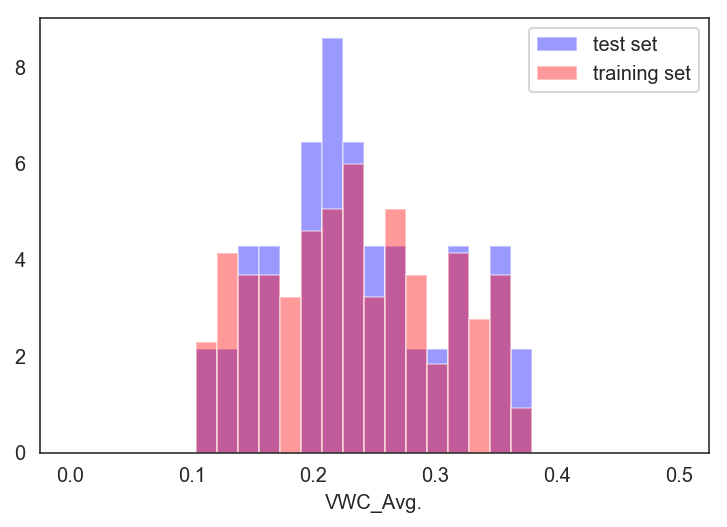

['M_C', 'S_K', 'S_L', 'Sa_L']


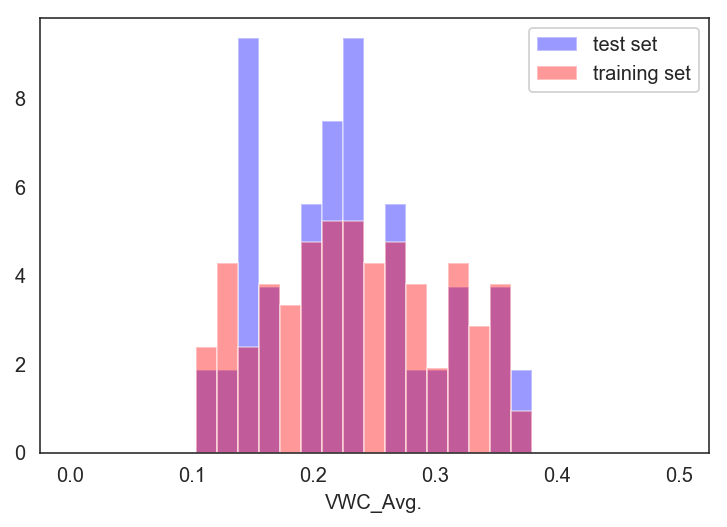

['M_C', 'S_L', 'S_P', 'Sa_L']


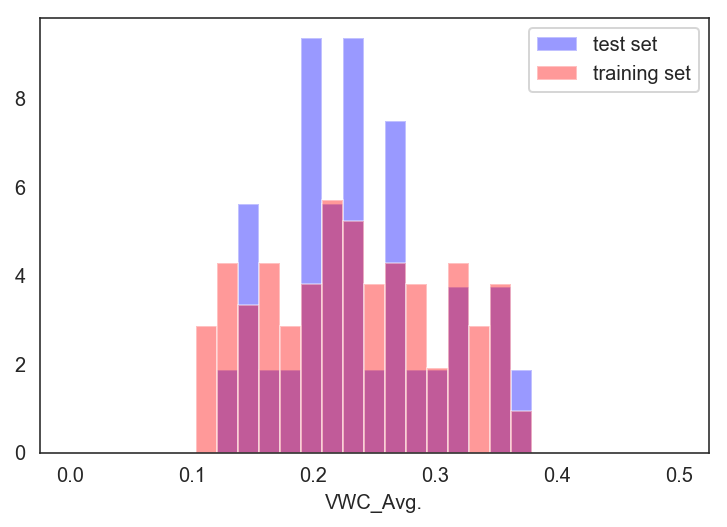

['M_C', 'S_K', 'S_L', 'Sa_J']


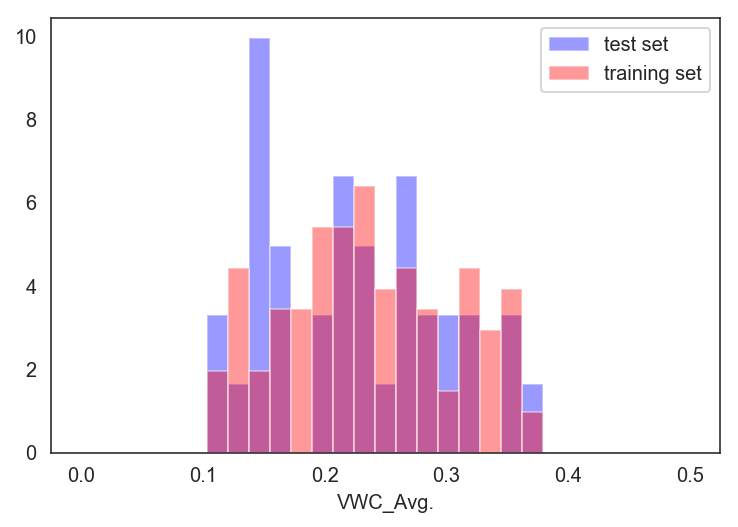

['M_C', 'S_I', 'S_L', 'Sa_J']


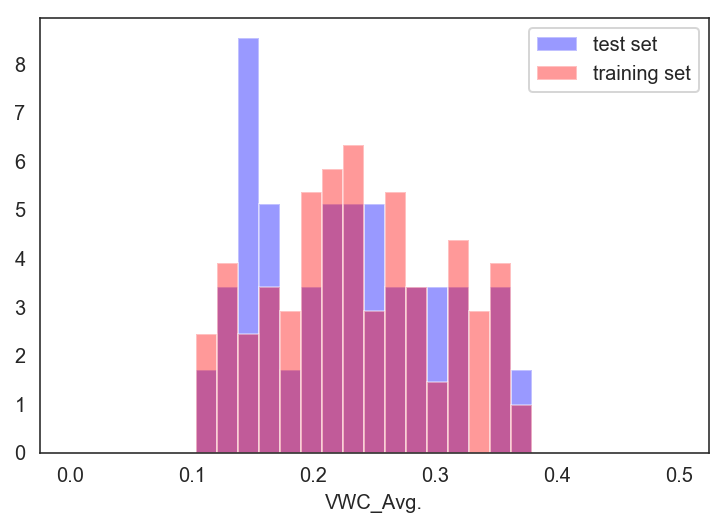

['M_C', 'S_L', 'S_P', 'Sa_J']


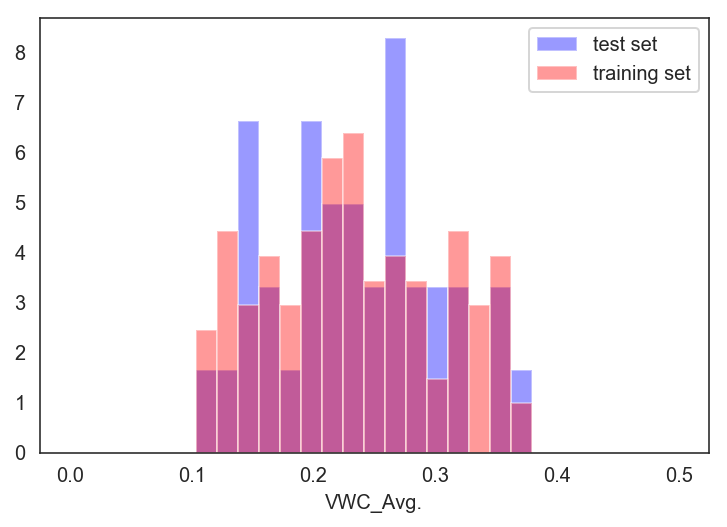

['M_C', 'M_H', 'S_K', 'Sa_L']


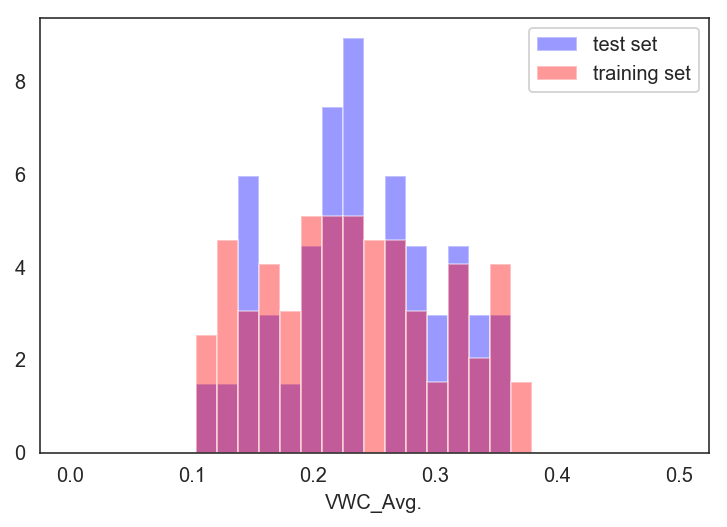

['M_C', 'M_E', 'S_K', 'Sa_J']


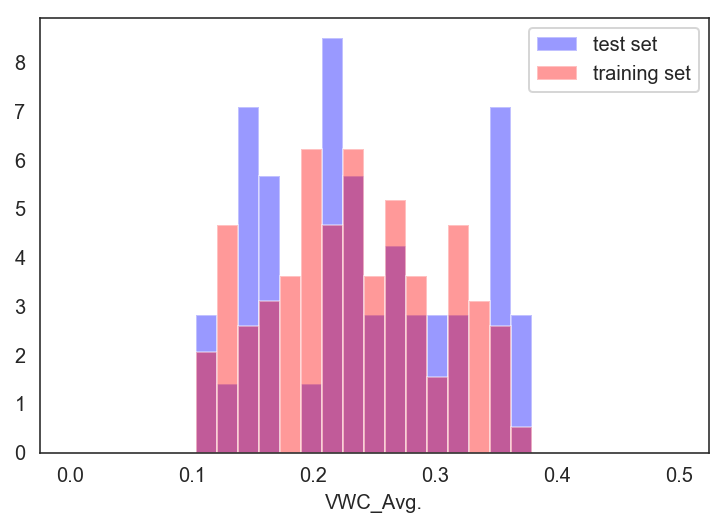

['M_C', 'M_G', 'S_I', 'Sa_L']


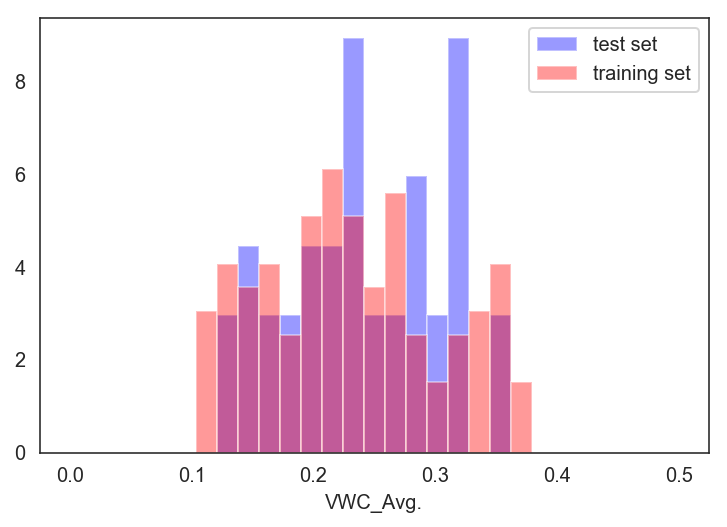

['M_C', 'M_E', 'S_I', 'Sa_J']


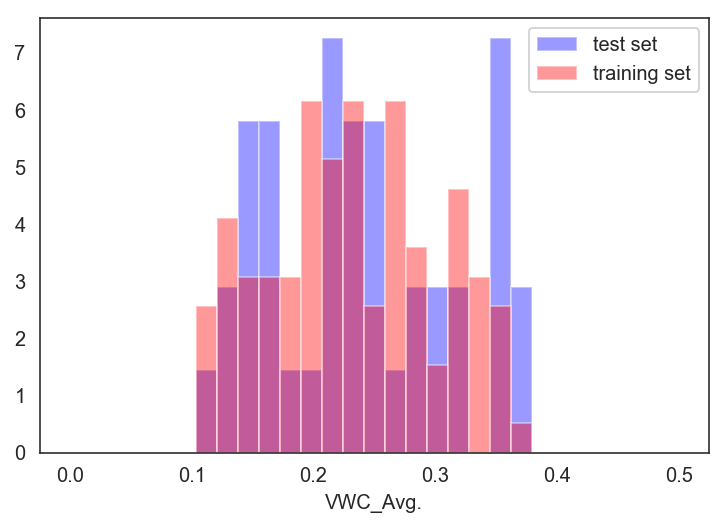

['M_C', 'M_F', 'S_I', 'Sa_J']


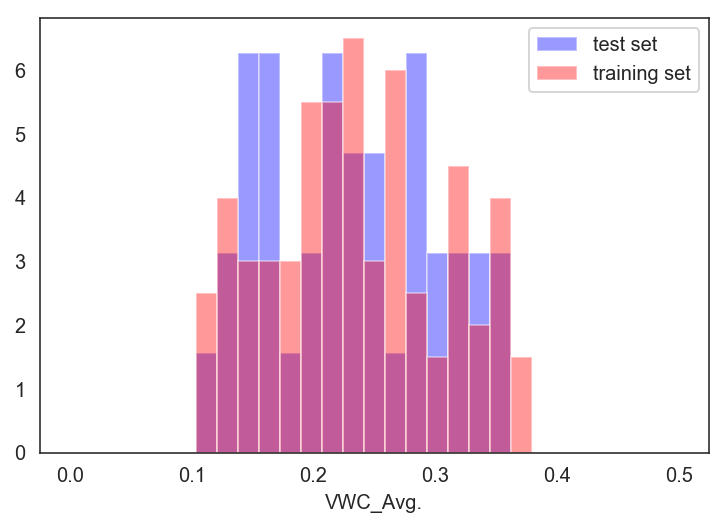

['M_C', 'M_H', 'S_I', 'Sa_J']


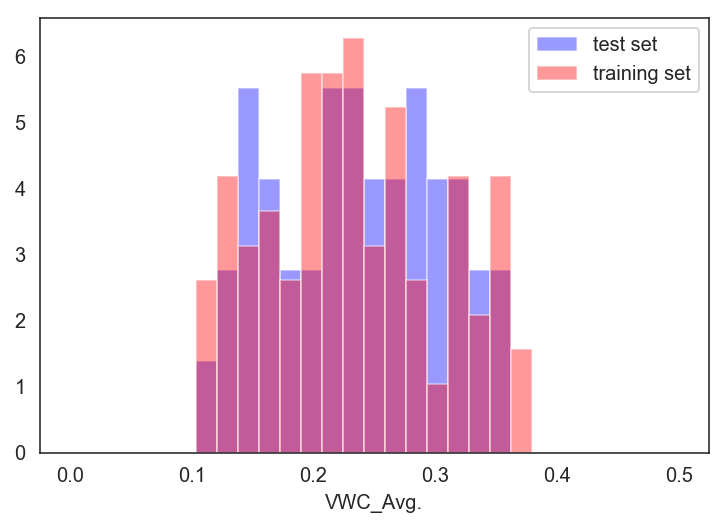

['M_C', 'M_E', 'S_P', 'Sa_J']


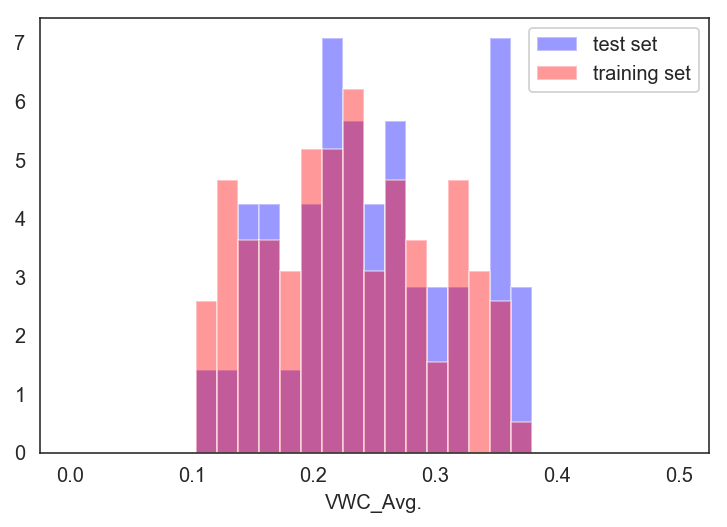

['M_C', 'M_G', 'S_R', 'Sa_L']


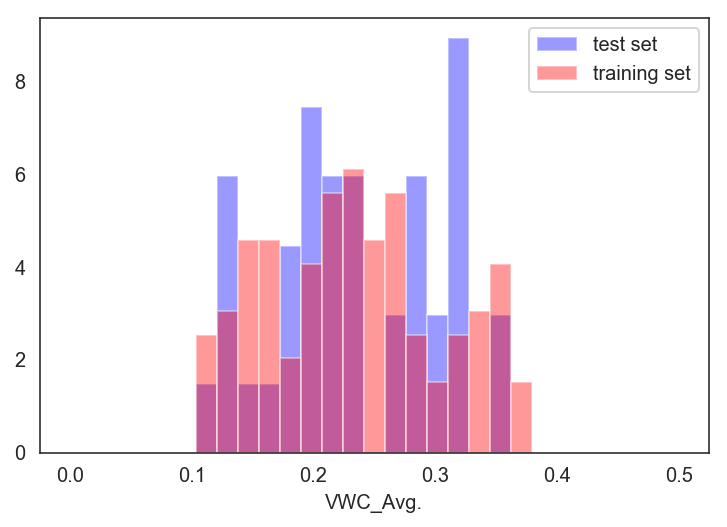

['M_C', 'M_H', 'S_R', 'Sa_J']


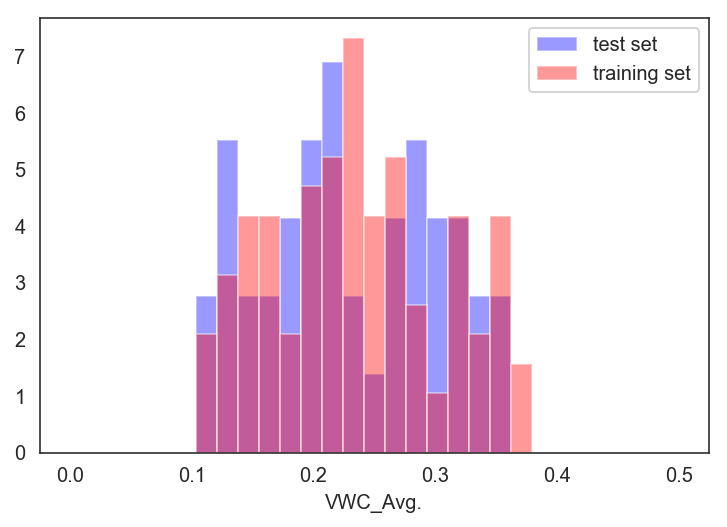

['M_D', 'M_H', 'S_R', 'Sa_L']


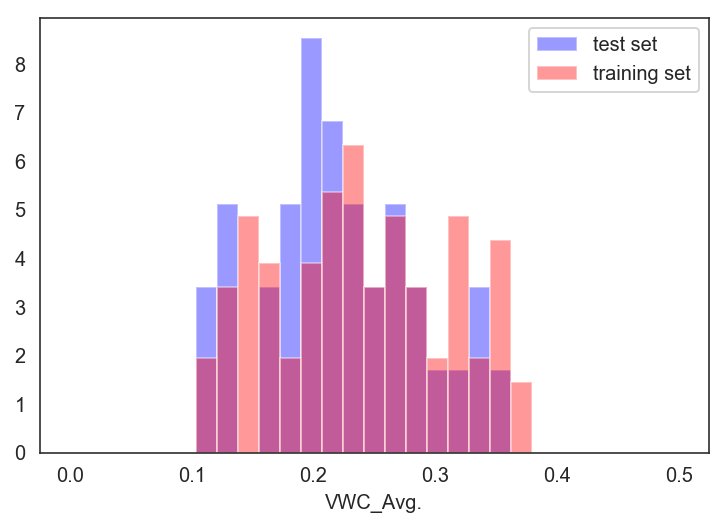

['M_E', 'M_H', 'S_I', 'Sa_J']


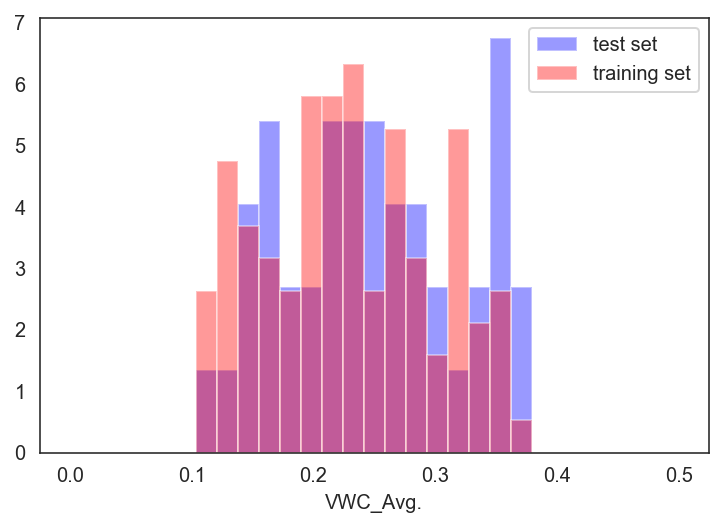

['M_F', 'M_G', 'S_K', 'Sa_K']


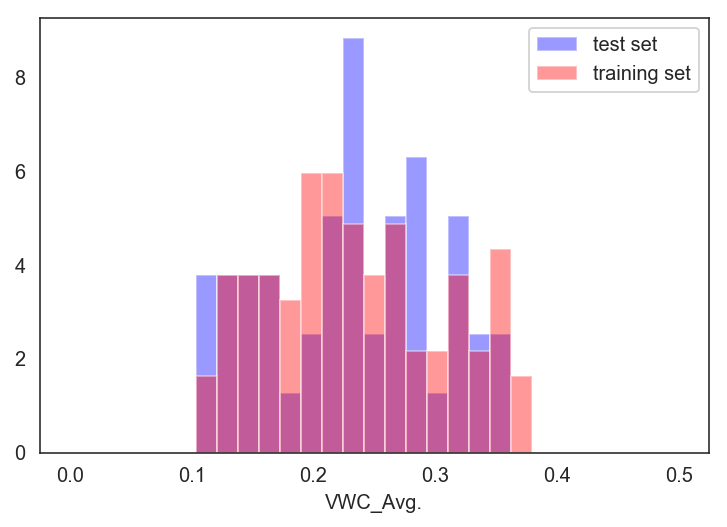

['M_F', 'M_H', 'S_K', 'Sa_K']


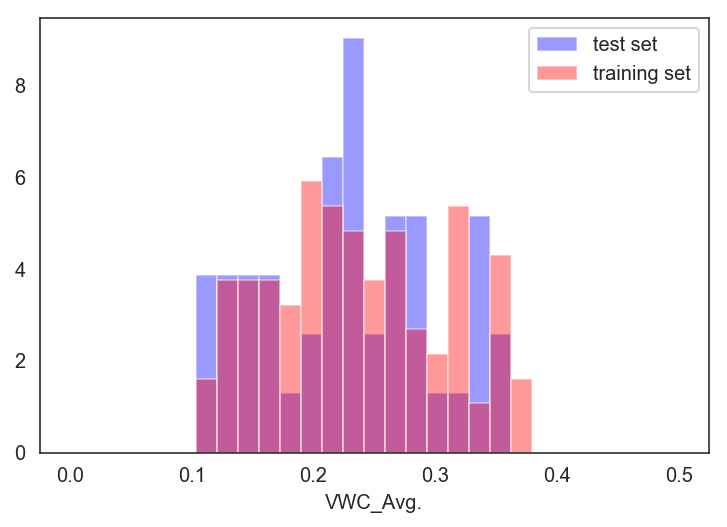

['M_F', 'M_G', 'S_I', 'Sa_L']


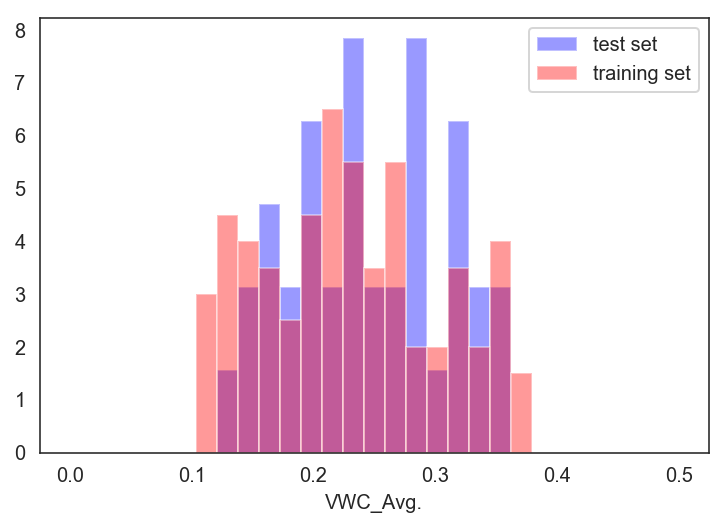

['M_F', 'M_H', 'S_I', 'Sa_L']


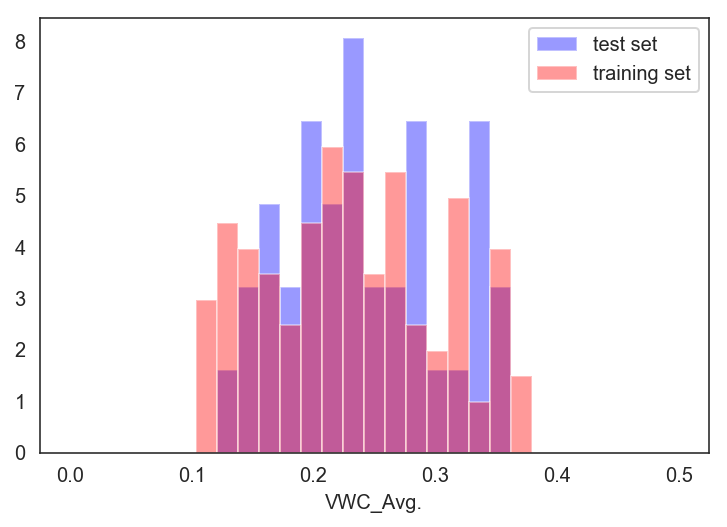

['M_F', 'M_G', 'S_Q', 'Sa_K']


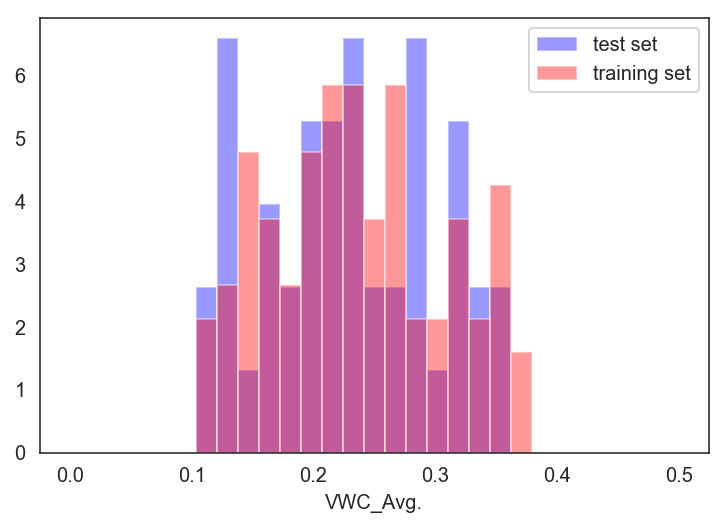

['M_F', 'M_H', 'S_Q', 'Sa_K']


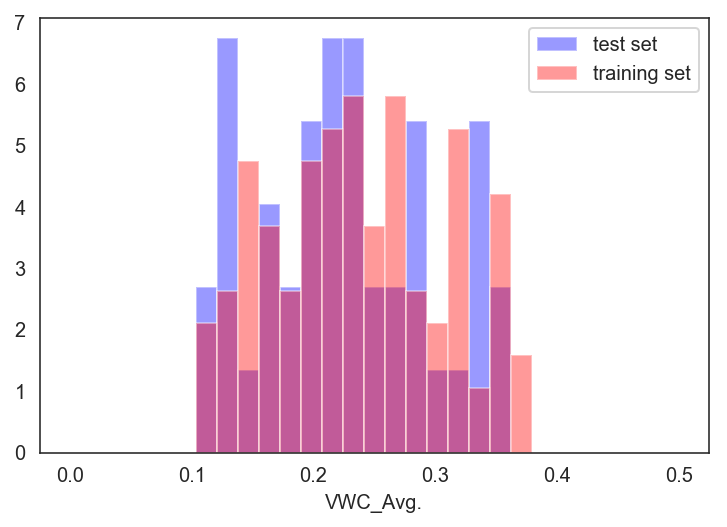

['M_F', 'M_G', 'S_R', 'Sa_K']


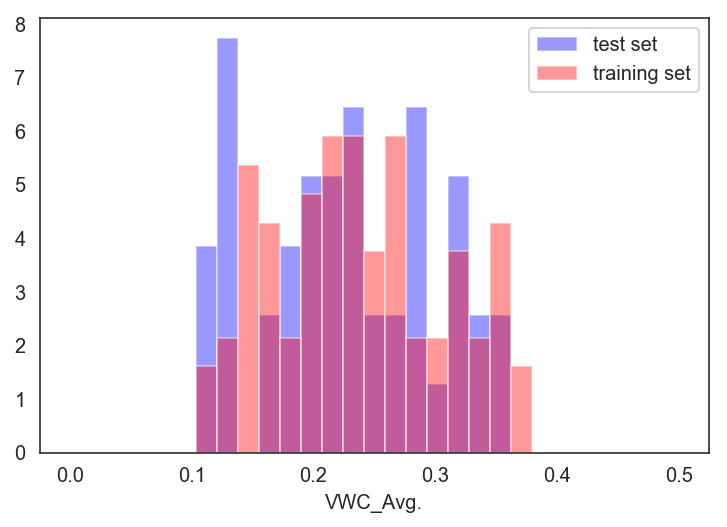

['M_G', 'S_I', 'S_L', 'Sa_L']


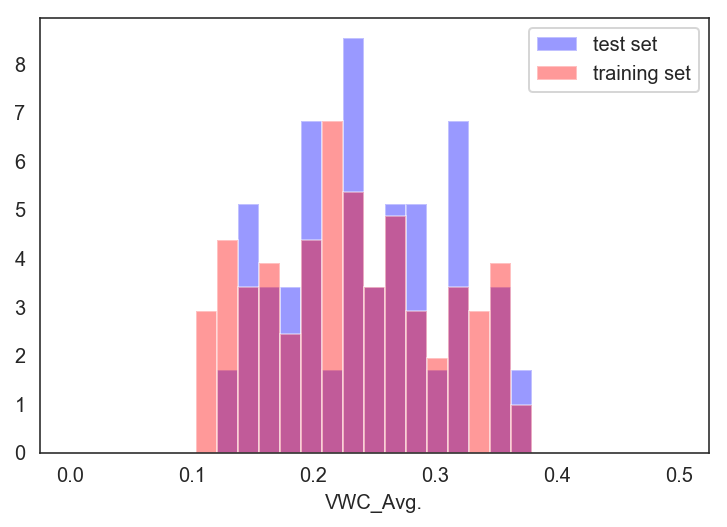

['M_G', 'S_L', 'S_R', 'Sa_L']


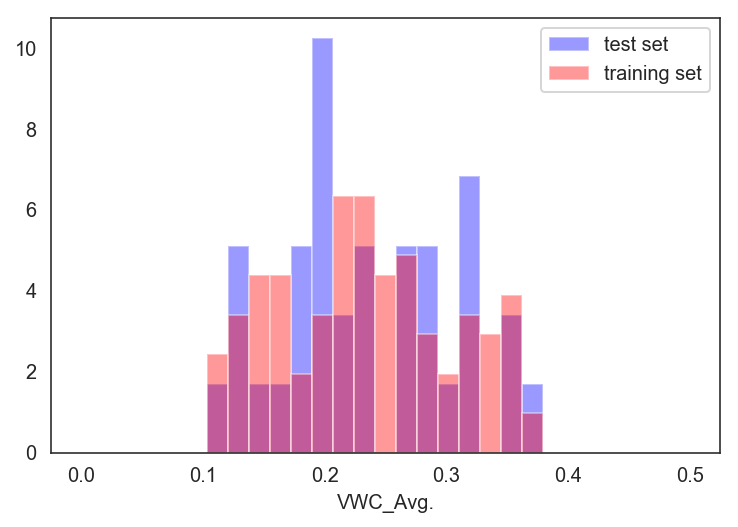

['M_G', 'M_H', 'S_Q', 'Sa_K']


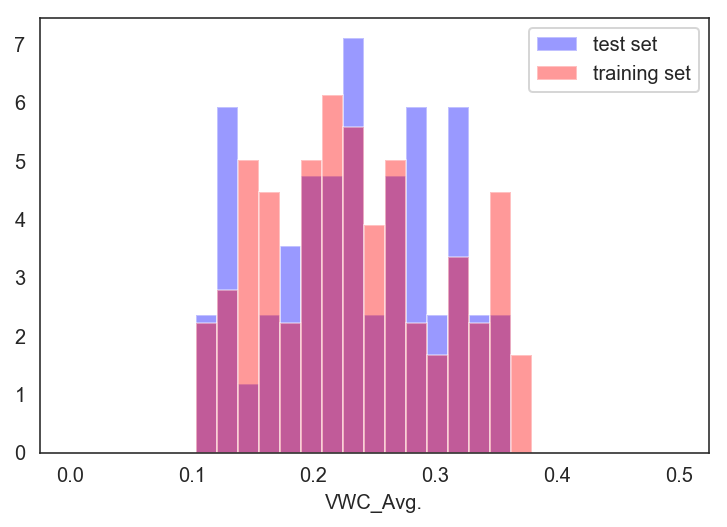

['M_H', 'S_K', 'S_L', 'Sa_L']


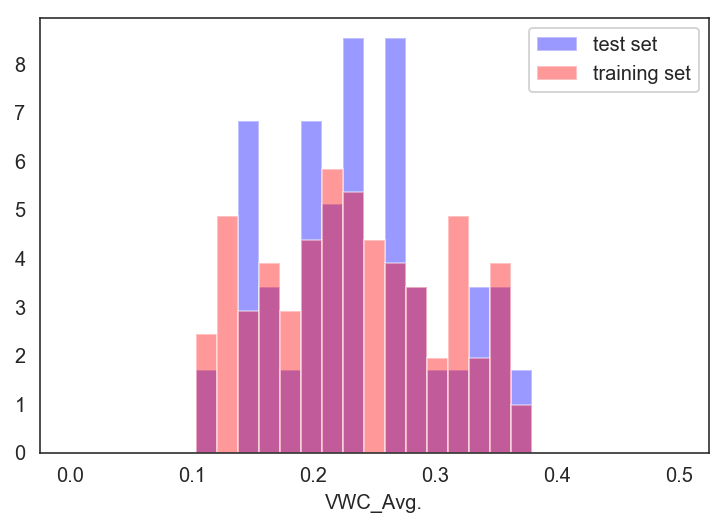

['M_H', 'S_I', 'S_L', 'Sa_L']


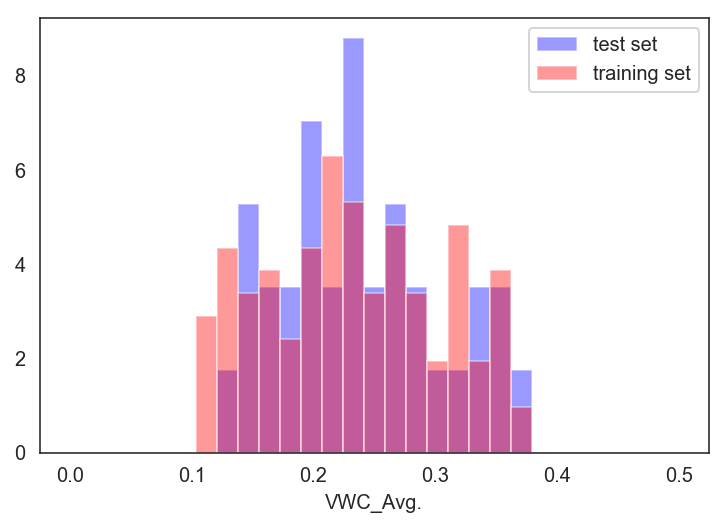

['M_H', 'S_L', 'S_Q', 'Sa_L']


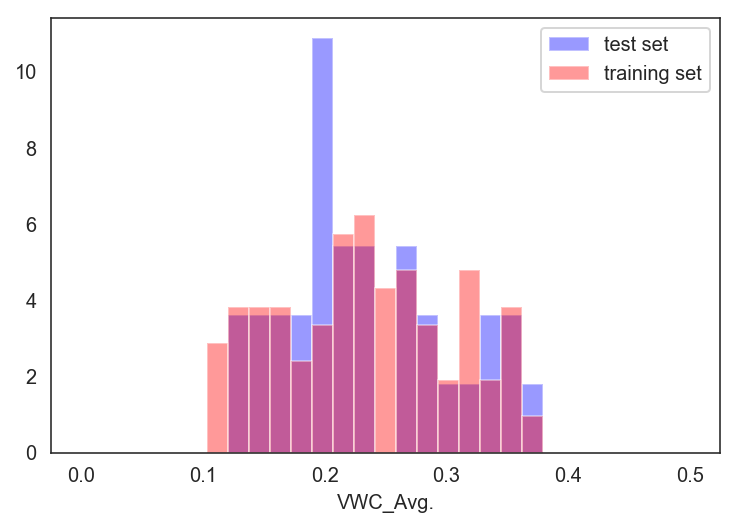

['M_H', 'S_L', 'S_R', 'Sa_L']


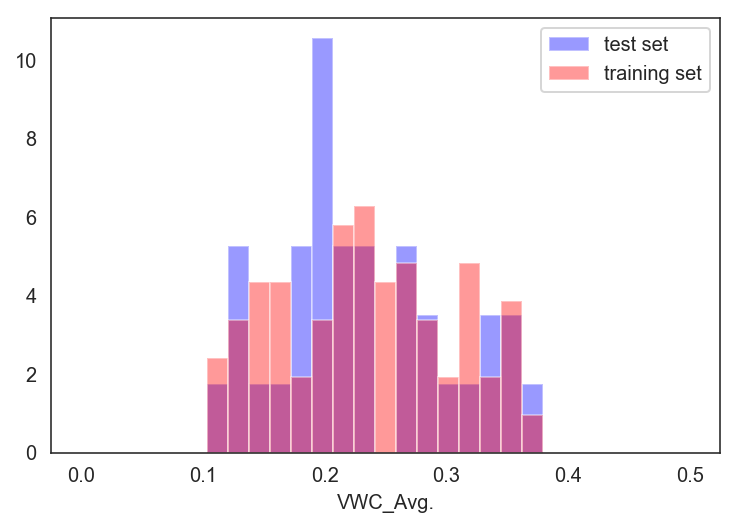

['M_H', 'S_I', 'S_L', 'Sa_J']


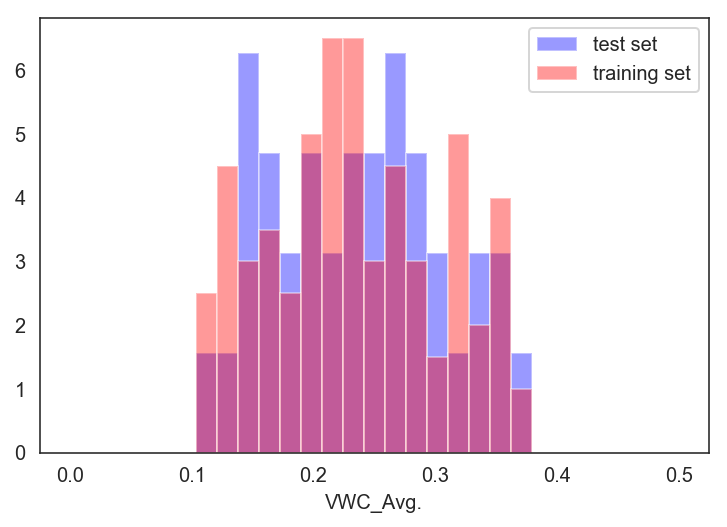

<Figure size 432x288 with 0 Axes>

In [13]:
for stations in combs:

    is_testset = ((df['Station']==stations[0]) | (df['Station']==stations[1]) | (df['Station']==stations[2]) | (df['Station']==stations[3]))
    hist1, bins1 = np.histogram(df[is_testset]['VWC_Avg.'].dropna(), bins=np.arange(0,0.5, 0.05), density=True)
    hist2, bins2 = np.histogram(df[is_testset==False]['VWC_Avg.'].dropna(), bins=np.arange(0,0.5, 0.05), density=True)
    hist = np.abs(hist1-hist2)
    if np.mean(hist)<0.45:
        print(stations)
        sns.distplot(df[is_testset]['VWC_Avg.'].dropna(), color='blue', label='test set', kde=False, norm_hist=True, bins=np.linspace(0,0.5, 30))
        sns.distplot(df[is_testset==False]['VWC_Avg.'].dropna(), color='red', label='training set', kde=False, norm_hist=True, bins=np.linspace(0,0.5, 30))
        plt.legend()
        plt.savefig('./plots/'+stations[0]+stations[1]+stations[2]+stations[3]+'.pdf', dpi=300)
        plt.show()
        plt.clf()
                    
                    

#### We chose M_H, M_G, S_Q and Sa_K for test dataset with conditions: 
1. at least one station out of each ground type
2. equal range of test and training data
3. simmilar distribution

Later we need to cut at the lower and upper end of the distribution

In [10]:
is_testset = ((df['Station']=='M_F') | (df['Station']=='M_G') | (df['Station']=='S_Q') | (df['Station']=='Sa_K'))

df = df[(df['VWC_Avg.']>0.1) & (df['VWC_Avg.']<0.39)]

df[is_testset].to_csv('./processed_data/merged_dataset_test_station.csv', sep=';', na_rep='NA')
df[is_testset==False].to_csv('./processed_data/merged_dataset_train_station.csv', sep=';', na_rep='NA')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [11]:
print(df.columns.values.tolist())

['Date', 'Station', 'EC_Avg.3.', 'EC_Avg.6.', 'EC_Avg.9.', 'Temp5TE_C_Avg.3.', 'Temp5TE_C_Avg.6.', 'Temp5TE_C_Avg.9.', 'AirTemp_C_Avg', 'RelHumid', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b8a', 'VWC_Avg.']
